In [1]:
from platform import python_version
python_version()

'3.9.7'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.8.0


 **Download dos dados**

In [21]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

57344/49082 [===================================] - 1s 18us/step


In [22]:
# nomes das colunas

nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [23]:
# carrega os dados

dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)

In [24]:
dataset.shape

(506, 14)

In [25]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Vamos dividir os dados em treino e teste com proporção 80/20**

In [26]:
# split dos dados

dados_treino = dataset.sample(frac=0.8, random_state=0)
dados_teste = dataset.drop(dados_treino.index)

## Modelagem Preditiva - Regressão Linear Simples

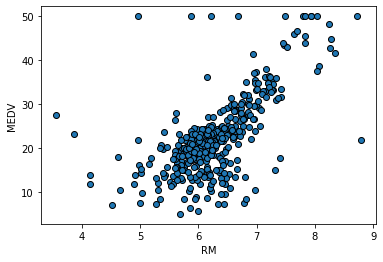

In [27]:
# representação visual dos dados de treino

fig, ax = plt.subplots()
x = dados_treino['RM'] # numero medio de quartos por moradia
y = dados_treino['MEDV'] # valor da mediana das casas ocupadas por proprietarios

ax.scatter(x, y, edgecolors=(0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

### Basicamente temos *MEDV = f(RM)* e queremos estimar a função f() usando regressão linear

In [28]:
# divisão

x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']

x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

## Criação do Modelo

In [29]:
# funcao para construir o modelo

def modelo_linear():
    # criar o modelo
    model = keras.Sequential([layers.Dense(1, use_bias=True, input_shape=(1,), name='layer')])
    
    # otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.99, epsilon=1e-05, amsgrad=False, name='Adam')
    
    # compila o modelo
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    
    return model

In [30]:
# cria o modelo
modelo = modelo_linear()

## Treinar o modelo

In [37]:
# hiperparametros

n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print(f'Checkpoint salvo a cada {n_samples_save} amostras')

Checkpoint salvo a cada 81000 amostras


In [38]:
# callback

earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=n_idle_epochs, min_delta=0.001)

In [39]:
prediction_list = []

In [40]:
checkpoint_path = 'dados/'

In [41]:
# checkpoint do modelo a cada n_samples_sava
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath='dados/', verbose=1, save_weights_only=True, save_freq = n_samples_save)

In [42]:
# salva a primeira versão do modelo (pesos)
modelo.save_weights(checkpoint_path.format(epoch=0))

In [43]:
# treinamento

history = modelo.fit(x_treino, y_treino, batch_size=batch_size, epochs=n_epochs, validation_split=0.1, verbose=1, callbacks= [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 1s 457ms/step - loss: 463.0965 - mae: 19.7504 - mse: 463.0965 - val_loss: 545.7051 - val_mae: 21.0058 - val_mse: 545.7051
Epoch 2/4000
2/2 [==============================] - 0s 81ms/step - loss: 457.2595 - mae: 19.6054 - mse: 457.2595 - val_loss: 539.4808 - val_mae: 20.8600 - val_mse: 539.4808
Epoch 3/4000
2/2 [==============================] - 0s 79ms/step - loss: 451.4295 - mae: 19.4602 - mse: 451.4295 - val_loss: 533.3042 - val_mae: 20.7144 - val_mse: 533.3042
Epoch 4/4000
2/2 [==============================] - 0s 61ms/step - loss: 445.6844 - mae: 19.3152 - mse: 445.6844 - val_loss: 527.1765 - val_mae: 20.5689 - val_mse: 527.1765
Epoch 5/4000
2/2 [==============================] - 0s 80ms/step - loss: 439.9849 - mae: 19.1705 - mse: 439.9849 - val_loss: 521.1042 - val_mae: 20.4237 - val_mse: 521.1042
Epoch 6/4000
2/2 [==============================] - 0s 68ms/step - loss: 434.2819 - mae: 19.0258 - mse: 434.2819 - val_loss: 515.0886 

2/2 [==============================] - 0s 76ms/step - loss: 243.6916 - mae: 13.3930 - mse: 243.6916 - val_loss: 311.3094 - val_mae: 14.6559 - val_mse: 311.3094
Epoch 49/4000
2/2 [==============================] - 0s 98ms/step - loss: 240.1972 - mae: 13.2738 - mse: 240.1972 - val_loss: 307.5722 - val_mae: 14.5395 - val_mse: 307.5722
Epoch 50/4000
2/2 [==============================] - 0s 131ms/step - loss: 236.7846 - mae: 13.1554 - mse: 236.7846 - val_loss: 303.8760 - val_mae: 14.4259 - val_mse: 303.8760
Epoch 51/4000
2/2 [==============================] - 0s 81ms/step - loss: 233.4396 - mae: 13.0392 - mse: 233.4396 - val_loss: 300.2213 - val_mae: 14.3126 - val_mse: 300.2213
Epoch 52/4000
2/2 [==============================] - 0s 71ms/step - loss: 230.1254 - mae: 12.9243 - mse: 230.1254 - val_loss: 296.6157 - val_mae: 14.1998 - val_mse: 296.6157
Epoch 53/4000
2/2 [==============================] - 0s 69ms/step - loss: 226.8202 - mae: 12.8112 - mse: 226.8202 - val_loss: 293.0594 - val_ma

2/2 [==============================] - 0s 61ms/step - loss: 124.5338 - mae: 8.7325 - mse: 124.5338 - val_loss: 180.0179 - val_mae: 10.2084 - val_mse: 180.0179
Epoch 96/4000
2/2 [==============================] - 0s 47ms/step - loss: 122.9078 - mae: 8.6599 - mse: 122.9078 - val_loss: 178.0799 - val_mae: 10.1308 - val_mse: 178.0799
Epoch 97/4000
2/2 [==============================] - 0s 43ms/step - loss: 121.1916 - mae: 8.5869 - mse: 121.1916 - val_loss: 176.1926 - val_mae: 10.0544 - val_mse: 176.1926
Epoch 98/4000
2/2 [==============================] - 0s 44ms/step - loss: 119.5737 - mae: 8.5150 - mse: 119.5737 - val_loss: 174.3390 - val_mae: 9.9805 - val_mse: 174.3390
Epoch 99/4000
2/2 [==============================] - 0s 48ms/step - loss: 117.9800 - mae: 8.4436 - mse: 117.9800 - val_loss: 172.5221 - val_mae: 9.9100 - val_mse: 172.5221
Epoch 100/4000
2/2 [==============================] - 0s 42ms/step - loss: 116.3921 - mae: 8.3739 - mse: 116.3921 - val_loss: 170.7397 - val_mae: 9.840

Epoch 143/4000
2/2 [==============================] - 0s 47ms/step - loss: 71.7635 - mae: 6.1560 - mse: 71.7635 - val_loss: 117.7096 - val_mae: 7.7140 - val_mse: 117.7096
Epoch 144/4000
2/2 [==============================] - 0s 50ms/step - loss: 71.1884 - mae: 6.1240 - mse: 71.1884 - val_loss: 116.9591 - val_mae: 7.6854 - val_mse: 116.9591
Epoch 145/4000
2/2 [==============================] - 0s 44ms/step - loss: 70.6033 - mae: 6.0908 - mse: 70.6033 - val_loss: 116.2244 - val_mae: 7.6572 - val_mse: 116.2244
Epoch 146/4000
2/2 [==============================] - 0s 42ms/step - loss: 70.0583 - mae: 6.0582 - mse: 70.0583 - val_loss: 115.5018 - val_mae: 7.6291 - val_mse: 115.5018
Epoch 147/4000
2/2 [==============================] - 0s 41ms/step - loss: 69.5002 - mae: 6.0263 - mse: 69.5002 - val_loss: 114.7960 - val_mae: 7.6013 - val_mse: 114.7960
Epoch 148/4000
2/2 [==============================] - 0s 44ms/step - loss: 68.9767 - mae: 5.9945 - mse: 68.9767 - val_loss: 114.1029 - val_mae: 7

2/2 [==============================] - 0s 44ms/step - loss: 56.8699 - mae: 5.2801 - mse: 56.8699 - val_loss: 96.6363 - val_mae: 6.8803 - val_mse: 96.6363
Epoch 192/4000
2/2 [==============================] - 0s 40ms/step - loss: 56.7713 - mae: 5.2757 - mse: 56.7713 - val_loss: 96.4408 - val_mae: 6.8740 - val_mse: 96.4408
Epoch 193/4000
2/2 [==============================] - 0s 49ms/step - loss: 56.6699 - mae: 5.2721 - mse: 56.6699 - val_loss: 96.2532 - val_mae: 6.8678 - val_mse: 96.2532
Epoch 194/4000
2/2 [==============================] - 0s 44ms/step - loss: 56.5772 - mae: 5.2684 - mse: 56.5772 - val_loss: 96.0732 - val_mae: 6.8618 - val_mse: 96.0732
Epoch 195/4000
2/2 [==============================] - 0s 106ms/step - loss: 56.4822 - mae: 5.2656 - mse: 56.4822 - val_loss: 95.9010 - val_mae: 6.8560 - val_mse: 95.9010
Epoch 196/4000
2/2 [==============================] - 0s 49ms/step - loss: 56.4010 - mae: 5.2638 - mse: 56.4010 - val_loss: 95.7339 - val_mae: 6.8502 - val_mse: 95.7339


2/2 [==============================] - 0s 44ms/step - loss: 55.0434 - mae: 5.2845 - mse: 55.0434 - val_loss: 92.1624 - val_mae: 6.7911 - val_mse: 92.1624
Epoch 240/4000
2/2 [==============================] - 0s 47ms/step - loss: 55.0410 - mae: 5.2858 - mse: 55.0410 - val_loss: 92.1297 - val_mae: 6.7909 - val_mse: 92.1297
Epoch 241/4000
2/2 [==============================] - 0s 49ms/step - loss: 55.0346 - mae: 5.2871 - mse: 55.0346 - val_loss: 92.1010 - val_mae: 6.7906 - val_mse: 92.1010
Epoch 242/4000
2/2 [==============================] - 0s 44ms/step - loss: 55.0318 - mae: 5.2885 - mse: 55.0318 - val_loss: 92.0746 - val_mae: 6.7904 - val_mse: 92.0746
Epoch 243/4000
2/2 [==============================] - 0s 43ms/step - loss: 55.0296 - mae: 5.2896 - mse: 55.0296 - val_loss: 92.0544 - val_mae: 6.7902 - val_mse: 92.0544
Epoch 244/4000
2/2 [==============================] - 0s 43ms/step - loss: 55.0217 - mae: 5.2902 - mse: 55.0217 - val_loss: 92.0410 - val_mae: 6.7900 - val_mse: 92.0410
E

2/2 [==============================] - 0s 44ms/step - loss: 54.9093 - mae: 5.3034 - mse: 54.9093 - val_loss: 91.6346 - val_mae: 6.7825 - val_mse: 91.6346
Epoch 288/4000
2/2 [==============================] - 0s 46ms/step - loss: 54.9075 - mae: 5.3042 - mse: 54.9075 - val_loss: 91.6212 - val_mae: 6.7822 - val_mse: 91.6212
Epoch 289/4000
2/2 [==============================] - 0s 45ms/step - loss: 54.9040 - mae: 5.3046 - mse: 54.9040 - val_loss: 91.6111 - val_mae: 6.7820 - val_mse: 91.6111
Epoch 290/4000
2/2 [==============================] - 0s 42ms/step - loss: 54.9025 - mae: 5.3053 - mse: 54.9025 - val_loss: 91.5974 - val_mae: 6.7818 - val_mse: 91.5974
Epoch 291/4000
2/2 [==============================] - 0s 45ms/step - loss: 54.9013 - mae: 5.3059 - mse: 54.9013 - val_loss: 91.5917 - val_mae: 6.7816 - val_mse: 91.5917
Epoch 292/4000
2/2 [==============================] - 0s 42ms/step - loss: 54.8958 - mae: 5.3056 - mse: 54.8958 - val_loss: 91.5973 - val_mae: 6.7815 - val_mse: 91.5973
E

2/2 [==============================] - 0s 47ms/step - loss: 54.7450 - mae: 5.2961 - mse: 54.7450 - val_loss: 91.5065 - val_mae: 6.7731 - val_mse: 91.5065
Epoch 336/4000
2/2 [==============================] - 0s 46ms/step - loss: 54.7410 - mae: 5.2949 - mse: 54.7410 - val_loss: 91.5163 - val_mae: 6.7730 - val_mse: 91.5163
Epoch 337/4000
2/2 [==============================] - 0s 45ms/step - loss: 54.7375 - mae: 5.2939 - mse: 54.7375 - val_loss: 91.5204 - val_mae: 6.7728 - val_mse: 91.5204
Epoch 338/4000
2/2 [==============================] - 0s 45ms/step - loss: 54.7320 - mae: 5.2933 - mse: 54.7320 - val_loss: 91.5162 - val_mae: 6.7725 - val_mse: 91.5162
Epoch 339/4000
2/2 [==============================] - 0s 43ms/step - loss: 54.7277 - mae: 5.2931 - mse: 54.7277 - val_loss: 91.5105 - val_mae: 6.7722 - val_mse: 91.5105
Epoch 340/4000
2/2 [==============================] - 0s 41ms/step - loss: 54.7258 - mae: 5.2933 - mse: 54.7258 - val_loss: 91.5064 - val_mae: 6.7720 - val_mse: 91.5064
E

2/2 [==============================] - 0s 43ms/step - loss: 54.5069 - mae: 5.2735 - mse: 54.5069 - val_loss: 91.4526 - val_mae: 6.7602 - val_mse: 91.4526
Epoch 384/4000
2/2 [==============================] - 0s 46ms/step - loss: 54.4982 - mae: 5.2740 - mse: 54.4982 - val_loss: 91.4398 - val_mae: 6.7598 - val_mse: 91.4398
Epoch 385/4000
2/2 [==============================] - 0s 46ms/step - loss: 54.4923 - mae: 5.2742 - mse: 54.4923 - val_loss: 91.4234 - val_mae: 6.7593 - val_mse: 91.4234
Epoch 386/4000
2/2 [==============================] - 0s 52ms/step - loss: 54.4857 - mae: 5.2746 - mse: 54.4857 - val_loss: 91.4063 - val_mae: 6.7589 - val_mse: 91.4063
Epoch 387/4000
2/2 [==============================] - 0s 49ms/step - loss: 54.4793 - mae: 5.2749 - mse: 54.4793 - val_loss: 91.3890 - val_mae: 6.7585 - val_mse: 91.3890
Epoch 388/4000
2/2 [==============================] - 0s 43ms/step - loss: 54.4776 - mae: 5.2759 - mse: 54.4776 - val_loss: 91.3705 - val_mae: 6.7580 - val_mse: 91.3705
E

2/2 [==============================] - 0s 46ms/step - loss: 54.1943 - mae: 5.2830 - mse: 54.1943 - val_loss: 90.8638 - val_mae: 6.7390 - val_mse: 90.8638
Epoch 432/4000
2/2 [==============================] - 0s 50ms/step - loss: 54.1800 - mae: 5.2794 - mse: 54.1800 - val_loss: 90.9085 - val_mae: 6.7389 - val_mse: 90.9085
Epoch 433/4000
2/2 [==============================] - 0s 48ms/step - loss: 54.1660 - mae: 5.2743 - mse: 54.1660 - val_loss: 90.9791 - val_mae: 6.7390 - val_mse: 90.9791
Epoch 434/4000
2/2 [==============================] - 0s 48ms/step - loss: 54.1610 - mae: 5.2677 - mse: 54.1610 - val_loss: 91.0525 - val_mae: 6.7391 - val_mse: 91.0525
Epoch 435/4000
2/2 [==============================] - 0s 46ms/step - loss: 54.1413 - mae: 5.2624 - mse: 54.1413 - val_loss: 91.1139 - val_mae: 6.7392 - val_mse: 91.1139
Epoch 436/4000
2/2 [==============================] - 0s 48ms/step - loss: 54.1428 - mae: 5.2582 - mse: 54.1428 - val_loss: 91.1889 - val_mae: 6.7392 - val_mse: 91.1889
E

2/2 [==============================] - 0s 54ms/step - loss: 53.8008 - mae: 5.2348 - mse: 53.8008 - val_loss: 90.9473 - val_mae: 6.7195 - val_mse: 90.9473
Epoch 480/4000
2/2 [==============================] - 0s 41ms/step - loss: 53.7906 - mae: 5.2334 - mse: 53.7906 - val_loss: 90.9744 - val_mae: 6.7193 - val_mse: 90.9744
Epoch 481/4000
2/2 [==============================] - 0s 42ms/step - loss: 53.7835 - mae: 5.2308 - mse: 53.7835 - val_loss: 90.9983 - val_mae: 6.7190 - val_mse: 90.9983
Epoch 482/4000
2/2 [==============================] - 0s 51ms/step - loss: 53.7816 - mae: 5.2290 - mse: 53.7816 - val_loss: 91.0131 - val_mae: 6.7187 - val_mse: 91.0131
Epoch 483/4000
2/2 [==============================] - 0s 42ms/step - loss: 53.7732 - mae: 5.2279 - mse: 53.7732 - val_loss: 91.0033 - val_mae: 6.7182 - val_mse: 91.0033
Epoch 484/4000
2/2 [==============================] - 0s 41ms/step - loss: 53.7690 - mae: 5.2281 - mse: 53.7690 - val_loss: 91.0178 - val_mae: 6.7179 - val_mse: 91.0178
E

2/2 [==============================] - 0s 68ms/step - loss: 53.4175 - mae: 5.2192 - mse: 53.4175 - val_loss: 90.5592 - val_mae: 6.6963 - val_mse: 90.5592
Epoch 528/4000
2/2 [==============================] - 0s 46ms/step - loss: 53.4091 - mae: 5.2184 - mse: 53.4091 - val_loss: 90.5643 - val_mae: 6.6959 - val_mse: 90.5643
Epoch 529/4000
2/2 [==============================] - 0s 64ms/step - loss: 53.4003 - mae: 5.2174 - mse: 53.4003 - val_loss: 90.5613 - val_mae: 6.6954 - val_mse: 90.5613
Epoch 530/4000
2/2 [==============================] - 0s 47ms/step - loss: 53.3942 - mae: 5.2167 - mse: 53.3942 - val_loss: 90.5471 - val_mae: 6.6949 - val_mse: 90.5471
Epoch 531/4000
2/2 [==============================] - 0s 52ms/step - loss: 53.3948 - mae: 5.2179 - mse: 53.3948 - val_loss: 90.5197 - val_mae: 6.6942 - val_mse: 90.5197
Epoch 532/4000
2/2 [==============================] - 0s 45ms/step - loss: 53.3760 - mae: 5.2178 - mse: 53.3760 - val_loss: 90.5334 - val_mae: 6.6939 - val_mse: 90.5334
E

2/2 [==============================] - 0s 54ms/step - loss: 53.0175 - mae: 5.1757 - mse: 53.0175 - val_loss: 90.6673 - val_mae: 6.6743 - val_mse: 90.6673
Epoch 576/4000
2/2 [==============================] - 0s 60ms/step - loss: 53.0185 - mae: 5.1736 - mse: 53.0185 - val_loss: 90.7016 - val_mae: 6.6740 - val_mse: 90.7016
Epoch 577/4000
2/2 [==============================] - 0s 59ms/step - loss: 53.0127 - mae: 5.1717 - mse: 53.0127 - val_loss: 90.6872 - val_mae: 6.6735 - val_mse: 90.6872
Epoch 578/4000
2/2 [==============================] - 0s 52ms/step - loss: 53.0001 - mae: 5.1720 - mse: 53.0001 - val_loss: 90.6299 - val_mae: 6.6727 - val_mse: 90.6299
Epoch 579/4000
2/2 [==============================] - 0s 48ms/step - loss: 52.9852 - mae: 5.1732 - mse: 52.9852 - val_loss: 90.5632 - val_mae: 6.6718 - val_mse: 90.5632
Epoch 580/4000
2/2 [==============================] - 0s 53ms/step - loss: 52.9730 - mae: 5.1759 - mse: 52.9730 - val_loss: 90.4837 - val_mae: 6.6708 - val_mse: 90.4837
E

2/2 [==============================] - 0s 44ms/step - loss: 52.6106 - mae: 5.1750 - mse: 52.6106 - val_loss: 90.0067 - val_mae: 6.6479 - val_mse: 90.0067
Epoch 624/4000
2/2 [==============================] - 0s 45ms/step - loss: 52.6045 - mae: 5.1703 - mse: 52.6045 - val_loss: 90.0606 - val_mae: 6.6478 - val_mse: 90.0606
Epoch 625/4000
2/2 [==============================] - 0s 55ms/step - loss: 52.5924 - mae: 5.1660 - mse: 52.5924 - val_loss: 90.1021 - val_mae: 6.6476 - val_mse: 90.1021
Epoch 626/4000
2/2 [==============================] - 0s 50ms/step - loss: 52.5846 - mae: 5.1617 - mse: 52.5846 - val_loss: 90.1725 - val_mae: 6.6476 - val_mse: 90.1725
Epoch 627/4000
2/2 [==============================] - 0s 46ms/step - loss: 52.5976 - mae: 5.1578 - mse: 52.5976 - val_loss: 90.2190 - val_mae: 6.6475 - val_mse: 90.2190
Epoch 628/4000
2/2 [==============================] - 0s 51ms/step - loss: 52.5753 - mae: 5.1549 - mse: 52.5753 - val_loss: 90.2018 - val_mae: 6.6469 - val_mse: 90.2018
E

2/2 [==============================] - 0s 49ms/step - loss: 52.2216 - mae: 5.1531 - mse: 52.2216 - val_loss: 89.6724 - val_mae: 6.6232 - val_mse: 89.6724
Epoch 672/4000
2/2 [==============================] - 0s 53ms/step - loss: 52.2121 - mae: 5.1511 - mse: 52.2121 - val_loss: 89.6835 - val_mae: 6.6228 - val_mse: 89.6835
Epoch 673/4000
2/2 [==============================] - 0s 56ms/step - loss: 52.2024 - mae: 5.1495 - mse: 52.2024 - val_loss: 89.6917 - val_mae: 6.6224 - val_mse: 89.6917
Epoch 674/4000
2/2 [==============================] - 0s 53ms/step - loss: 52.1926 - mae: 5.1480 - mse: 52.1926 - val_loss: 89.7156 - val_mae: 6.6221 - val_mse: 89.7156
Epoch 675/4000
2/2 [==============================] - 0s 65ms/step - loss: 52.1824 - mae: 5.1450 - mse: 52.1824 - val_loss: 89.7598 - val_mae: 6.6219 - val_mse: 89.7598
Epoch 676/4000
2/2 [==============================] - 0s 52ms/step - loss: 52.1755 - mae: 5.1412 - mse: 52.1755 - val_loss: 89.8028 - val_mae: 6.6217 - val_mse: 89.8028
E

2/2 [==============================] - 0s 50ms/step - loss: 51.8052 - mae: 5.1219 - mse: 51.8052 - val_loss: 89.4446 - val_mae: 6.5969 - val_mse: 89.4446
Epoch 720/4000
2/2 [==============================] - 0s 51ms/step - loss: 51.7804 - mae: 5.1203 - mse: 51.7804 - val_loss: 89.4877 - val_mae: 6.5967 - val_mse: 89.4877
Epoch 721/4000
2/2 [==============================] - 0s 54ms/step - loss: 51.7732 - mae: 5.1169 - mse: 51.7732 - val_loss: 89.5389 - val_mae: 6.5965 - val_mse: 89.5389
Epoch 722/4000
2/2 [==============================] - 0s 46ms/step - loss: 51.7689 - mae: 5.1137 - mse: 51.7689 - val_loss: 89.5775 - val_mae: 6.5963 - val_mse: 89.5775
Epoch 723/4000
2/2 [==============================] - 0s 45ms/step - loss: 51.7588 - mae: 5.1108 - mse: 51.7588 - val_loss: 89.5945 - val_mae: 6.5959 - val_mse: 89.5945
Epoch 724/4000
2/2 [==============================] - 0s 53ms/step - loss: 51.7524 - mae: 5.1090 - mse: 51.7524 - val_loss: 89.6285 - val_mae: 6.5956 - val_mse: 89.6285
E

2/2 [==============================] - 0s 51ms/step - loss: 51.4058 - mae: 5.0782 - mse: 51.4058 - val_loss: 89.5172 - val_mae: 6.5735 - val_mse: 89.5172
Epoch 768/4000
2/2 [==============================] - 0s 47ms/step - loss: 51.3944 - mae: 5.0784 - mse: 51.3944 - val_loss: 89.4903 - val_mae: 6.5729 - val_mse: 89.4903
Epoch 769/4000
2/2 [==============================] - 0s 48ms/step - loss: 51.3844 - mae: 5.0794 - mse: 51.3844 - val_loss: 89.4322 - val_mae: 6.5720 - val_mse: 89.4322
Epoch 770/4000
2/2 [==============================] - 0s 52ms/step - loss: 51.3697 - mae: 5.0809 - mse: 51.3697 - val_loss: 89.3758 - val_mae: 6.5712 - val_mse: 89.3758
Epoch 771/4000
2/2 [==============================] - 0s 45ms/step - loss: 51.3717 - mae: 5.0841 - mse: 51.3717 - val_loss: 89.3169 - val_mae: 6.5703 - val_mse: 89.3169
Epoch 772/4000
2/2 [==============================] - 0s 78ms/step - loss: 51.3509 - mae: 5.0849 - mse: 51.3509 - val_loss: 89.2911 - val_mae: 6.5697 - val_mse: 89.2911
E

2/2 [==============================] - 0s 50ms/step - loss: 51.0186 - mae: 5.0597 - mse: 51.0186 - val_loss: 89.1705 - val_mae: 6.5485 - val_mse: 89.1705
Epoch 816/4000
2/2 [==============================] - 0s 48ms/step - loss: 51.0115 - mae: 5.0594 - mse: 51.0115 - val_loss: 89.1571 - val_mae: 6.5479 - val_mse: 89.1571
Epoch 817/4000
2/2 [==============================] - 0s 55ms/step - loss: 51.0037 - mae: 5.0594 - mse: 51.0037 - val_loss: 89.1446 - val_mae: 6.5473 - val_mse: 89.1446
Epoch 818/4000
2/2 [==============================] - 0s 48ms/step - loss: 50.9948 - mae: 5.0590 - mse: 50.9948 - val_loss: 89.1376 - val_mae: 6.5468 - val_mse: 89.1376
Epoch 819/4000
2/2 [==============================] - 0s 48ms/step - loss: 50.9874 - mae: 5.0589 - mse: 50.9874 - val_loss: 89.1220 - val_mae: 6.5462 - val_mse: 89.1220
Epoch 820/4000
2/2 [==============================] - 0s 49ms/step - loss: 50.9779 - mae: 5.0586 - mse: 50.9779 - val_loss: 89.1119 - val_mae: 6.5457 - val_mse: 89.1119
E

2/2 [==============================] - 0s 45ms/step - loss: 50.6331 - mae: 5.0498 - mse: 50.6331 - val_loss: 88.6751 - val_mae: 6.5216 - val_mse: 88.6751
Epoch 864/4000
2/2 [==============================] - 0s 48ms/step - loss: 50.6244 - mae: 5.0476 - mse: 50.6244 - val_loss: 88.7092 - val_mae: 6.5214 - val_mse: 88.7092
Epoch 865/4000
2/2 [==============================] - 0s 49ms/step - loss: 50.6240 - mae: 5.0448 - mse: 50.6240 - val_loss: 88.7439 - val_mae: 6.5212 - val_mse: 88.7439
Epoch 866/4000
2/2 [==============================] - 0s 51ms/step - loss: 50.6108 - mae: 5.0426 - mse: 50.6108 - val_loss: 88.7497 - val_mae: 6.5208 - val_mse: 88.7497
Epoch 867/4000
2/2 [==============================] - 0s 49ms/step - loss: 50.6043 - mae: 5.0416 - mse: 50.6043 - val_loss: 88.7710 - val_mae: 6.5204 - val_mse: 88.7710
Epoch 868/4000
2/2 [==============================] - 0s 49ms/step - loss: 50.5935 - mae: 5.0394 - mse: 50.5935 - val_loss: 88.8211 - val_mae: 6.5203 - val_mse: 88.8211
E

2/2 [==============================] - 0s 48ms/step - loss: 50.2759 - mae: 5.0207 - mse: 50.2759 - val_loss: 88.5166 - val_mae: 6.4978 - val_mse: 88.5166
Epoch 912/4000
2/2 [==============================] - 0s 46ms/step - loss: 50.2650 - mae: 5.0208 - mse: 50.2650 - val_loss: 88.5114 - val_mae: 6.4973 - val_mse: 88.5114
Epoch 913/4000
2/2 [==============================] - 0s 44ms/step - loss: 50.2574 - mae: 5.0203 - mse: 50.2574 - val_loss: 88.5071 - val_mae: 6.4968 - val_mse: 88.5071
Epoch 914/4000
2/2 [==============================] - 0s 50ms/step - loss: 50.2506 - mae: 5.0197 - mse: 50.2506 - val_loss: 88.4966 - val_mae: 6.4962 - val_mse: 88.4966
Epoch 915/4000
2/2 [==============================] - 0s 50ms/step - loss: 50.2413 - mae: 5.0198 - mse: 50.2413 - val_loss: 88.4665 - val_mae: 6.4955 - val_mse: 88.4665
Epoch 916/4000
2/2 [==============================] - 0s 46ms/step - loss: 50.2334 - mae: 5.0206 - mse: 50.2334 - val_loss: 88.4348 - val_mae: 6.4948 - val_mse: 88.4348
E

2/2 [==============================] - 0s 52ms/step - loss: 49.9048 - mae: 5.0025 - mse: 49.9048 - val_loss: 88.2046 - val_mae: 6.4720 - val_mse: 88.2046
Epoch 960/4000
2/2 [==============================] - 0s 50ms/step - loss: 49.8988 - mae: 5.0016 - mse: 49.8988 - val_loss: 88.2279 - val_mae: 6.4717 - val_mse: 88.2279
Epoch 961/4000
2/2 [==============================] - 0s 54ms/step - loss: 49.8857 - mae: 4.9990 - mse: 49.8857 - val_loss: 88.2876 - val_mae: 6.4716 - val_mse: 88.2876
Epoch 962/4000
2/2 [==============================] - 0s 55ms/step - loss: 49.8867 - mae: 4.9953 - mse: 49.8867 - val_loss: 88.3624 - val_mae: 6.4716 - val_mse: 88.3624
Epoch 963/4000
2/2 [==============================] - 0s 46ms/step - loss: 49.8796 - mae: 4.9910 - mse: 49.8796 - val_loss: 88.4064 - val_mae: 6.4715 - val_mse: 88.4064
Epoch 964/4000
2/2 [==============================] - 0s 50ms/step - loss: 49.8729 - mae: 4.9885 - mse: 49.8729 - val_loss: 88.4289 - val_mae: 6.4712 - val_mse: 88.4289
E

2/2 [==============================] - 0s 45ms/step - loss: 49.5608 - mae: 4.9798 - mse: 49.5608 - val_loss: 87.9520 - val_mae: 6.4474 - val_mse: 87.9520
Epoch 1008/4000
2/2 [==============================] - 0s 47ms/step - loss: 49.5505 - mae: 4.9805 - mse: 49.5505 - val_loss: 87.9462 - val_mae: 6.4469 - val_mse: 87.9462
Epoch 1009/4000
2/2 [==============================] - 0s 48ms/step - loss: 49.5434 - mae: 4.9802 - mse: 49.5434 - val_loss: 87.9395 - val_mae: 6.4465 - val_mse: 87.9395
Epoch 1010/4000
2/2 [==============================] - 0s 48ms/step - loss: 49.5370 - mae: 4.9798 - mse: 49.5370 - val_loss: 87.9339 - val_mae: 6.4460 - val_mse: 87.9339
Epoch 1011/4000
2/2 [==============================] - 0s 45ms/step - loss: 49.5308 - mae: 4.9797 - mse: 49.5308 - val_loss: 87.9283 - val_mae: 6.4455 - val_mse: 87.9283
Epoch 1012/4000
2/2 [==============================] - 0s 48ms/step - loss: 49.5229 - mae: 4.9791 - mse: 49.5229 - val_loss: 87.9465 - val_mae: 6.4450 - val_mse: 87.9

2/2 [==============================] - 0s 53ms/step - loss: 49.2609 - mae: 4.9399 - mse: 49.2609 - val_loss: 88.2814 - val_mae: 6.4429 - val_mse: 88.2814
Epoch 1056/4000
2/2 [==============================] - 0s 49ms/step - loss: 49.2646 - mae: 4.9376 - mse: 49.2646 - val_loss: 88.3227 - val_mae: 6.4443 - val_mse: 88.3227
Epoch 1057/4000
2/2 [==============================] - 0s 46ms/step - loss: 49.2667 - mae: 4.9360 - mse: 49.2667 - val_loss: 88.3454 - val_mae: 6.4450 - val_mse: 88.3454
Epoch 1058/4000
2/2 [==============================] - 0s 48ms/step - loss: 49.2625 - mae: 4.9344 - mse: 49.2625 - val_loss: 88.3765 - val_mae: 6.4460 - val_mse: 88.3765
Epoch 1059/4000
2/2 [==============================] - 0s 51ms/step - loss: 49.2626 - mae: 4.9331 - mse: 49.2626 - val_loss: 88.3898 - val_mae: 6.4463 - val_mse: 88.3898
Epoch 1060/4000
2/2 [==============================] - 0s 47ms/step - loss: 49.2608 - mae: 4.9323 - mse: 49.2608 - val_loss: 88.3734 - val_mae: 6.4455 - val_mse: 88.3

2/2 [==============================] - 0s 44ms/step - loss: 48.9396 - mae: 4.9252 - mse: 48.9396 - val_loss: 87.9063 - val_mae: 6.4195 - val_mse: 87.9063
Epoch 1104/4000
2/2 [==============================] - 0s 48ms/step - loss: 48.9374 - mae: 4.9239 - mse: 48.9374 - val_loss: 87.9111 - val_mae: 6.4195 - val_mse: 87.9111
Epoch 1105/4000
2/2 [==============================] - 0s 52ms/step - loss: 48.9299 - mae: 4.9232 - mse: 48.9299 - val_loss: 87.8811 - val_mae: 6.4181 - val_mse: 87.8811
Epoch 1106/4000
2/2 [==============================] - 0s 48ms/step - loss: 48.9230 - mae: 4.9241 - mse: 48.9230 - val_loss: 87.8310 - val_mae: 6.4159 - val_mse: 87.8310
Epoch 1107/4000
2/2 [==============================] - 0s 47ms/step - loss: 48.9110 - mae: 4.9248 - mse: 48.9110 - val_loss: 87.7803 - val_mae: 6.4136 - val_mse: 87.7803
Epoch 1108/4000
2/2 [==============================] - 0s 49ms/step - loss: 48.8939 - mae: 4.9263 - mse: 48.8939 - val_loss: 87.6868 - val_mae: 6.4095 - val_mse: 87.6

2/2 [==============================] - 0s 44ms/step - loss: 48.6257 - mae: 4.9252 - mse: 48.6257 - val_loss: 87.2225 - val_mae: 6.3885 - val_mse: 87.2225
Epoch 1152/4000
2/2 [==============================] - 0s 52ms/step - loss: 48.6206 - mae: 4.9255 - mse: 48.6206 - val_loss: 87.1972 - val_mae: 6.3881 - val_mse: 87.1972
Epoch 1153/4000
2/2 [==============================] - 0s 46ms/step - loss: 48.6150 - mae: 4.9265 - mse: 48.6150 - val_loss: 87.1629 - val_mae: 6.3876 - val_mse: 87.1629
Epoch 1154/4000
2/2 [==============================] - 0s 44ms/step - loss: 48.6125 - mae: 4.9282 - mse: 48.6125 - val_loss: 87.1317 - val_mae: 6.3871 - val_mse: 87.1317
Epoch 1155/4000
2/2 [==============================] - 0s 45ms/step - loss: 48.6115 - mae: 4.9296 - mse: 48.6115 - val_loss: 87.1196 - val_mae: 6.3867 - val_mse: 87.1196
Epoch 1156/4000
2/2 [==============================] - 0s 50ms/step - loss: 48.6076 - mae: 4.9293 - mse: 48.6076 - val_loss: 87.1284 - val_mae: 6.3864 - val_mse: 87.1

2/2 [==============================] - 0s 44ms/step - loss: 48.3101 - mae: 4.8926 - mse: 48.3101 - val_loss: 87.2270 - val_mae: 6.3753 - val_mse: 87.2270
Epoch 1200/4000
2/2 [==============================] - 0s 50ms/step - loss: 48.2986 - mae: 4.8941 - mse: 48.2986 - val_loss: 87.1938 - val_mae: 6.3743 - val_mse: 87.1938
Epoch 1201/4000
2/2 [==============================] - 0s 50ms/step - loss: 48.2959 - mae: 4.8952 - mse: 48.2959 - val_loss: 87.1523 - val_mae: 6.3731 - val_mse: 87.1523
Epoch 1202/4000
2/2 [==============================] - 0s 46ms/step - loss: 48.2895 - mae: 4.8967 - mse: 48.2895 - val_loss: 87.1350 - val_mae: 6.3725 - val_mse: 87.1350
Epoch 1203/4000
2/2 [==============================] - 0s 62ms/step - loss: 48.2853 - mae: 4.8968 - mse: 48.2853 - val_loss: 87.1474 - val_mae: 6.3725 - val_mse: 87.1474
Epoch 1204/4000
2/2 [==============================] - 0s 46ms/step - loss: 48.2712 - mae: 4.8949 - mse: 48.2712 - val_loss: 87.2030 - val_mae: 6.3736 - val_mse: 87.2

2/2 [==============================] - 0s 51ms/step - loss: 48.0191 - mae: 4.8801 - mse: 48.0191 - val_loss: 86.9844 - val_mae: 6.3585 - val_mse: 86.9844
Epoch 1248/4000
2/2 [==============================] - 0s 52ms/step - loss: 48.0245 - mae: 4.8764 - mse: 48.0245 - val_loss: 87.0386 - val_mae: 6.3596 - val_mse: 87.0386
Epoch 1249/4000
2/2 [==============================] - 0s 59ms/step - loss: 48.0077 - mae: 4.8743 - mse: 48.0077 - val_loss: 87.0593 - val_mae: 6.3598 - val_mse: 87.0593
Epoch 1250/4000
2/2 [==============================] - 0s 85ms/step - loss: 48.0024 - mae: 4.8727 - mse: 48.0024 - val_loss: 87.0984 - val_mae: 6.3604 - val_mse: 87.0984
Epoch 1251/4000
2/2 [==============================] - 0s 60ms/step - loss: 47.9970 - mae: 4.8704 - mse: 47.9970 - val_loss: 87.1229 - val_mae: 6.3607 - val_mse: 87.1229
Epoch 1252/4000
2/2 [==============================] - 0s 50ms/step - loss: 47.9913 - mae: 4.8689 - mse: 47.9913 - val_loss: 87.1381 - val_mae: 6.3608 - val_mse: 87.1

2/2 [==============================] - 0s 65ms/step - loss: 47.7416 - mae: 4.8548 - mse: 47.7416 - val_loss: 86.8186 - val_mae: 6.3438 - val_mse: 86.8186
Epoch 1296/4000
2/2 [==============================] - 0s 52ms/step - loss: 47.7381 - mae: 4.8596 - mse: 47.7381 - val_loss: 86.7238 - val_mae: 6.3414 - val_mse: 86.7238
Epoch 1297/4000
2/2 [==============================] - 0s 50ms/step - loss: 47.7411 - mae: 4.8636 - mse: 47.7411 - val_loss: 86.6420 - val_mae: 6.3391 - val_mse: 86.6420
Epoch 1298/4000
2/2 [==============================] - 0s 50ms/step - loss: 47.7393 - mae: 4.8676 - mse: 47.7393 - val_loss: 86.5827 - val_mae: 6.3374 - val_mse: 86.5827
Epoch 1299/4000
2/2 [==============================] - 0s 57ms/step - loss: 47.7436 - mae: 4.8706 - mse: 47.7436 - val_loss: 86.5347 - val_mae: 6.3360 - val_mse: 86.5347
Epoch 1300/4000
2/2 [==============================] - 0s 62ms/step - loss: 47.7522 - mae: 4.8741 - mse: 47.7522 - val_loss: 86.5177 - val_mae: 6.3353 - val_mse: 86.5

2/2 [==============================] - 0s 45ms/step - loss: 47.4917 - mae: 4.8423 - mse: 47.4917 - val_loss: 86.5996 - val_mae: 6.3279 - val_mse: 86.5996
Epoch 1344/4000
2/2 [==============================] - 0s 63ms/step - loss: 47.4838 - mae: 4.8434 - mse: 47.4838 - val_loss: 86.5794 - val_mae: 6.3272 - val_mse: 86.5794
Epoch 1345/4000
2/2 [==============================] - 0s 61ms/step - loss: 47.4850 - mae: 4.8444 - mse: 47.4850 - val_loss: 86.5545 - val_mae: 6.3263 - val_mse: 86.5545
Epoch 1346/4000
2/2 [==============================] - 0s 58ms/step - loss: 47.4768 - mae: 4.8446 - mse: 47.4768 - val_loss: 86.5603 - val_mae: 6.3263 - val_mse: 86.5603
Epoch 1347/4000
2/2 [==============================] - 0s 66ms/step - loss: 47.4698 - mae: 4.8437 - mse: 47.4698 - val_loss: 86.5506 - val_mae: 6.3258 - val_mse: 86.5506
Epoch 1348/4000
2/2 [==============================] - 0s 58ms/step - loss: 47.4715 - mae: 4.8441 - mse: 47.4715 - val_loss: 86.5253 - val_mae: 6.3250 - val_mse: 86.5

2/2 [==============================] - 0s 47ms/step - loss: 47.2428 - mae: 4.8200 - mse: 47.2428 - val_loss: 86.5642 - val_mae: 6.3166 - val_mse: 86.5642
Epoch 1392/4000
2/2 [==============================] - 0s 42ms/step - loss: 47.2360 - mae: 4.8210 - mse: 47.2360 - val_loss: 86.5362 - val_mae: 6.3158 - val_mse: 86.5362
Epoch 1393/4000
2/2 [==============================] - 0s 48ms/step - loss: 47.2315 - mae: 4.8218 - mse: 47.2315 - val_loss: 86.5046 - val_mae: 6.3148 - val_mse: 86.5046
Epoch 1394/4000
2/2 [==============================] - 0s 47ms/step - loss: 47.2265 - mae: 4.8228 - mse: 47.2265 - val_loss: 86.4737 - val_mae: 6.3139 - val_mse: 86.4737
Epoch 1395/4000
2/2 [==============================] - 0s 47ms/step - loss: 47.2231 - mae: 4.8239 - mse: 47.2231 - val_loss: 86.4379 - val_mae: 6.3128 - val_mse: 86.4379
Epoch 1396/4000
2/2 [==============================] - 0s 57ms/step - loss: 47.2190 - mae: 4.8249 - mse: 47.2190 - val_loss: 86.4112 - val_mae: 6.3120 - val_mse: 86.4

2/2 [==============================] - 0s 50ms/step - loss: 47.0012 - mae: 4.8055 - mse: 47.0012 - val_loss: 86.4095 - val_mae: 6.3024 - val_mse: 86.4095
Epoch 1440/4000
2/2 [==============================] - 0s 56ms/step - loss: 46.9923 - mae: 4.8046 - mse: 46.9923 - val_loss: 86.4395 - val_mae: 6.3028 - val_mse: 86.4395
Epoch 1441/4000
2/2 [==============================] - 0s 43ms/step - loss: 46.9894 - mae: 4.8027 - mse: 46.9894 - val_loss: 86.4803 - val_mae: 6.3035 - val_mse: 86.4803
Epoch 1442/4000
2/2 [==============================] - 0s 50ms/step - loss: 46.9831 - mae: 4.8007 - mse: 46.9831 - val_loss: 86.5058 - val_mae: 6.3038 - val_mse: 86.5058
Epoch 1443/4000
2/2 [==============================] - 0s 52ms/step - loss: 46.9851 - mae: 4.7996 - mse: 46.9851 - val_loss: 86.5352 - val_mae: 6.3042 - val_mse: 86.5352
Epoch 1444/4000
2/2 [==============================] - 0s 49ms/step - loss: 46.9780 - mae: 4.7980 - mse: 46.9780 - val_loss: 86.5318 - val_mae: 6.3039 - val_mse: 86.5

2/2 [==============================] - 0s 48ms/step - loss: 46.7541 - mae: 4.7845 - mse: 46.7541 - val_loss: 86.3205 - val_mae: 6.2890 - val_mse: 86.3205
Epoch 1488/4000
2/2 [==============================] - 0s 46ms/step - loss: 46.7439 - mae: 4.7858 - mse: 46.7439 - val_loss: 86.2841 - val_mae: 6.2879 - val_mse: 86.2841
Epoch 1489/4000
2/2 [==============================] - 0s 53ms/step - loss: 46.7396 - mae: 4.7870 - mse: 46.7396 - val_loss: 86.2520 - val_mae: 6.2870 - val_mse: 86.2520
Epoch 1490/4000
2/2 [==============================] - 0s 46ms/step - loss: 46.7333 - mae: 4.7875 - mse: 46.7333 - val_loss: 86.2265 - val_mae: 6.2862 - val_mse: 86.2265
Epoch 1491/4000
2/2 [==============================] - 0s 48ms/step - loss: 46.7392 - mae: 4.7893 - mse: 46.7392 - val_loss: 86.1950 - val_mae: 6.2852 - val_mse: 86.1950
Epoch 1492/4000
2/2 [==============================] - 0s 50ms/step - loss: 46.7250 - mae: 4.7889 - mse: 46.7250 - val_loss: 86.2067 - val_mae: 6.2852 - val_mse: 86.2

2/2 [==============================] - 0s 47ms/step - loss: 46.5582 - mae: 4.7832 - mse: 46.5582 - val_loss: 86.0069 - val_mae: 6.2709 - val_mse: 86.0069
Epoch 1536/4000
2/2 [==============================] - 0s 59ms/step - loss: 46.5132 - mae: 4.7776 - mse: 46.5132 - val_loss: 86.0135 - val_mae: 6.2708 - val_mse: 86.0135
Epoch 1537/4000
2/2 [==============================] - 0s 53ms/step - loss: 46.5097 - mae: 4.7770 - mse: 46.5097 - val_loss: 86.0410 - val_mae: 6.2713 - val_mse: 86.0410
Epoch 1538/4000
2/2 [==============================] - 0s 45ms/step - loss: 46.5107 - mae: 4.7749 - mse: 46.5107 - val_loss: 86.0966 - val_mae: 6.2724 - val_mse: 86.0966
Epoch 1539/4000
2/2 [==============================] - 0s 47ms/step - loss: 46.5016 - mae: 4.7721 - mse: 46.5016 - val_loss: 86.1174 - val_mae: 6.2726 - val_mse: 86.1174
Epoch 1540/4000
2/2 [==============================] - 0s 47ms/step - loss: 46.4971 - mae: 4.7710 - mse: 46.4971 - val_loss: 86.1067 - val_mae: 6.2722 - val_mse: 86.1

2/2 [==============================] - 0s 46ms/step - loss: 46.3158 - mae: 4.7576 - mse: 46.3158 - val_loss: 86.0307 - val_mae: 6.2619 - val_mse: 86.0307
Epoch 1584/4000
2/2 [==============================] - 0s 52ms/step - loss: 46.3115 - mae: 4.7577 - mse: 46.3115 - val_loss: 86.0191 - val_mae: 6.2615 - val_mse: 86.0191
Epoch 1585/4000
2/2 [==============================] - 0s 50ms/step - loss: 46.3074 - mae: 4.7578 - mse: 46.3074 - val_loss: 86.0033 - val_mae: 6.2609 - val_mse: 86.0033
Epoch 1586/4000
2/2 [==============================] - 0s 53ms/step - loss: 46.3063 - mae: 4.7586 - mse: 46.3063 - val_loss: 85.9887 - val_mae: 6.2604 - val_mse: 85.9887
Epoch 1587/4000
2/2 [==============================] - 0s 57ms/step - loss: 46.3003 - mae: 4.7581 - mse: 46.3003 - val_loss: 85.9939 - val_mae: 6.2603 - val_mse: 85.9939
Epoch 1588/4000
2/2 [==============================] - 0s 48ms/step - loss: 46.2948 - mae: 4.7576 - mse: 46.2948 - val_loss: 85.9832 - val_mae: 6.2598 - val_mse: 85.9

2/2 [==============================] - 0s 52ms/step - loss: 46.1006 - mae: 4.7484 - mse: 46.1006 - val_loss: 85.7369 - val_mae: 6.2445 - val_mse: 85.7369
Epoch 1632/4000
2/2 [==============================] - 0s 47ms/step - loss: 46.0984 - mae: 4.7506 - mse: 46.0984 - val_loss: 85.6810 - val_mae: 6.2429 - val_mse: 85.6810
Epoch 1633/4000
2/2 [==============================] - 0s 48ms/step - loss: 46.1005 - mae: 4.7533 - mse: 46.1005 - val_loss: 85.6312 - val_mae: 6.2415 - val_mse: 85.6312
Epoch 1634/4000
2/2 [==============================] - 0s 49ms/step - loss: 46.1018 - mae: 4.7555 - mse: 46.1018 - val_loss: 85.6004 - val_mae: 6.2405 - val_mse: 85.6004
Epoch 1635/4000
2/2 [==============================] - 0s 49ms/step - loss: 46.1068 - mae: 4.7567 - mse: 46.1068 - val_loss: 85.5963 - val_mae: 6.2402 - val_mse: 85.5963
Epoch 1636/4000
2/2 [==============================] - 0s 46ms/step - loss: 46.0940 - mae: 4.7556 - mse: 46.0940 - val_loss: 85.6385 - val_mae: 6.2410 - val_mse: 85.6

2/2 [==============================] - 0s 47ms/step - loss: 45.9063 - mae: 4.7225 - mse: 45.9063 - val_loss: 85.9494 - val_mae: 6.2390 - val_mse: 85.9494
Epoch 1680/4000
2/2 [==============================] - 0s 43ms/step - loss: 45.8927 - mae: 4.7242 - mse: 45.8927 - val_loss: 85.8553 - val_mae: 6.2368 - val_mse: 85.8553
Epoch 1681/4000
2/2 [==============================] - 0s 50ms/step - loss: 45.9131 - mae: 4.7294 - mse: 45.9131 - val_loss: 85.7644 - val_mae: 6.2345 - val_mse: 85.7644
Epoch 1682/4000
2/2 [==============================] - 0s 51ms/step - loss: 45.8882 - mae: 4.7298 - mse: 45.8882 - val_loss: 85.7319 - val_mae: 6.2336 - val_mse: 85.7319
Epoch 1683/4000
2/2 [==============================] - 0s 48ms/step - loss: 45.8820 - mae: 4.7303 - mse: 45.8820 - val_loss: 85.7154 - val_mae: 6.2330 - val_mse: 85.7154
Epoch 1684/4000
2/2 [==============================] - 0s 47ms/step - loss: 45.8828 - mae: 4.7311 - mse: 45.8828 - val_loss: 85.6999 - val_mae: 6.2324 - val_mse: 85.6

2/2 [==============================] - 0s 52ms/step - loss: 45.7050 - mae: 4.7172 - mse: 45.7050 - val_loss: 85.6468 - val_mae: 6.2221 - val_mse: 85.6468
Epoch 1728/4000
2/2 [==============================] - 0s 52ms/step - loss: 45.6996 - mae: 4.7168 - mse: 45.6996 - val_loss: 85.6205 - val_mae: 6.2213 - val_mse: 85.6205
Epoch 1729/4000
2/2 [==============================] - 0s 53ms/step - loss: 45.6950 - mae: 4.7175 - mse: 45.6950 - val_loss: 85.6026 - val_mae: 6.2206 - val_mse: 85.6026
Epoch 1730/4000
2/2 [==============================] - 0s 46ms/step - loss: 45.6927 - mae: 4.7178 - mse: 45.6927 - val_loss: 85.5799 - val_mae: 6.2199 - val_mse: 85.5799
Epoch 1731/4000
2/2 [==============================] - 0s 48ms/step - loss: 45.6863 - mae: 4.7183 - mse: 45.6863 - val_loss: 85.5335 - val_mae: 6.2185 - val_mse: 85.5335
Epoch 1732/4000
2/2 [==============================] - 0s 48ms/step - loss: 45.6828 - mae: 4.7196 - mse: 45.6828 - val_loss: 85.4902 - val_mae: 6.2173 - val_mse: 85.4

2/2 [==============================] - 0s 44ms/step - loss: 45.5098 - mae: 4.7018 - mse: 45.5098 - val_loss: 85.5567 - val_mae: 6.2097 - val_mse: 85.5567
Epoch 1776/4000
2/2 [==============================] - 0s 48ms/step - loss: 45.5120 - mae: 4.7038 - mse: 45.5120 - val_loss: 85.5196 - val_mae: 6.2086 - val_mse: 85.5196
Epoch 1777/4000
2/2 [==============================] - 0s 49ms/step - loss: 45.5026 - mae: 4.7039 - mse: 45.5026 - val_loss: 85.5138 - val_mae: 6.2083 - val_mse: 85.5138
Epoch 1778/4000
2/2 [==============================] - 0s 50ms/step - loss: 45.5000 - mae: 4.7037 - mse: 45.5000 - val_loss: 85.5117 - val_mae: 6.2080 - val_mse: 85.5117
Epoch 1779/4000
2/2 [==============================] - 0s 46ms/step - loss: 45.4946 - mae: 4.7036 - mse: 45.4946 - val_loss: 85.4930 - val_mae: 6.2074 - val_mse: 85.4930
Epoch 1780/4000
2/2 [==============================] - 0s 48ms/step - loss: 45.4995 - mae: 4.7043 - mse: 45.4995 - val_loss: 85.4841 - val_mae: 6.2070 - val_mse: 85.4

2/2 [==============================] - 0s 53ms/step - loss: 45.3345 - mae: 4.6917 - mse: 45.3345 - val_loss: 85.5072 - val_mae: 6.1983 - val_mse: 85.5072
Epoch 1824/4000
2/2 [==============================] - 0s 52ms/step - loss: 45.3223 - mae: 4.6883 - mse: 45.3223 - val_loss: 85.5480 - val_mae: 6.1990 - val_mse: 85.5480
Epoch 1825/4000
2/2 [==============================] - 0s 49ms/step - loss: 45.3209 - mae: 4.6872 - mse: 45.3209 - val_loss: 85.5672 - val_mae: 6.1992 - val_mse: 85.5672
Epoch 1826/4000
2/2 [==============================] - 0s 46ms/step - loss: 45.3200 - mae: 4.6867 - mse: 45.3200 - val_loss: 85.5540 - val_mae: 6.1987 - val_mse: 85.5540
Epoch 1827/4000
2/2 [==============================] - 0s 49ms/step - loss: 45.3130 - mae: 4.6866 - mse: 45.3130 - val_loss: 85.5059 - val_mae: 6.1974 - val_mse: 85.5059
Epoch 1828/4000
2/2 [==============================] - 0s 46ms/step - loss: 45.3134 - mae: 4.6879 - mse: 45.3134 - val_loss: 85.4763 - val_mae: 6.1965 - val_mse: 85.4

2/2 [==============================] - 0s 47ms/step - loss: 45.1527 - mae: 4.6823 - mse: 45.1527 - val_loss: 85.2124 - val_mae: 6.1813 - val_mse: 85.2124
Epoch 1872/4000
2/2 [==============================] - 0s 53ms/step - loss: 45.1514 - mae: 4.6827 - mse: 45.1514 - val_loss: 85.1928 - val_mae: 6.1806 - val_mse: 85.1928
Epoch 1873/4000
2/2 [==============================] - 0s 43ms/step - loss: 45.1413 - mae: 4.6823 - mse: 45.1413 - val_loss: 85.2135 - val_mae: 6.1809 - val_mse: 85.2135
Epoch 1874/4000
2/2 [==============================] - 0s 44ms/step - loss: 45.1447 - mae: 4.6816 - mse: 45.1447 - val_loss: 85.2456 - val_mae: 6.1814 - val_mse: 85.2456
Epoch 1875/4000
2/2 [==============================] - 0s 45ms/step - loss: 45.1311 - mae: 4.6799 - mse: 45.1311 - val_loss: 85.2486 - val_mae: 6.1813 - val_mse: 85.2486
Epoch 1876/4000
2/2 [==============================] - 0s 51ms/step - loss: 45.1270 - mae: 4.6794 - mse: 45.1270 - val_loss: 85.2576 - val_mae: 6.1813 - val_mse: 85.2

2/2 [==============================] - 0s 51ms/step - loss: 44.9594 - mae: 4.6674 - mse: 44.9594 - val_loss: 85.1837 - val_mae: 6.1697 - val_mse: 85.1837
Epoch 1920/4000
2/2 [==============================] - 0s 50ms/step - loss: 44.9530 - mae: 4.6668 - mse: 44.9530 - val_loss: 85.1763 - val_mae: 6.1693 - val_mse: 85.1763
Epoch 1921/4000
2/2 [==============================] - 0s 49ms/step - loss: 44.9505 - mae: 4.6668 - mse: 44.9505 - val_loss: 85.1730 - val_mae: 6.1690 - val_mse: 85.1730
Epoch 1922/4000
2/2 [==============================] - 0s 47ms/step - loss: 44.9497 - mae: 4.6667 - mse: 44.9497 - val_loss: 85.1940 - val_mae: 6.1692 - val_mse: 85.1940
Epoch 1923/4000
2/2 [==============================] - 0s 54ms/step - loss: 44.9395 - mae: 4.6649 - mse: 44.9395 - val_loss: 85.2578 - val_mae: 6.1705 - val_mse: 85.2578
Epoch 1924/4000
2/2 [==============================] - 0s 50ms/step - loss: 44.9333 - mae: 4.6634 - mse: 44.9333 - val_loss: 85.3217 - val_mae: 6.1717 - val_mse: 85.3

2/2 [==============================] - 0s 49ms/step - loss: 44.7953 - mae: 4.6508 - mse: 44.7953 - val_loss: 85.3685 - val_mae: 6.1636 - val_mse: 85.3685
Epoch 1968/4000
2/2 [==============================] - 0s 55ms/step - loss: 44.7937 - mae: 4.6505 - mse: 44.7937 - val_loss: 85.3840 - val_mae: 6.1638 - val_mse: 85.3840
Epoch 1969/4000
2/2 [==============================] - 0s 56ms/step - loss: 44.7969 - mae: 4.6504 - mse: 44.7969 - val_loss: 85.3927 - val_mae: 6.1637 - val_mse: 85.3927
Epoch 1970/4000
2/2 [==============================] - 0s 46ms/step - loss: 44.7897 - mae: 4.6497 - mse: 44.7897 - val_loss: 85.3570 - val_mae: 6.1628 - val_mse: 85.3570
Epoch 1971/4000
2/2 [==============================] - 0s 49ms/step - loss: 44.7858 - mae: 4.6500 - mse: 44.7858 - val_loss: 85.3276 - val_mae: 6.1620 - val_mse: 85.3276
Epoch 1972/4000
2/2 [==============================] - 0s 46ms/step - loss: 44.7833 - mae: 4.6503 - mse: 44.7833 - val_loss: 85.3020 - val_mae: 6.1612 - val_mse: 85.3

2/2 [==============================] - 0s 48ms/step - loss: 44.6458 - mae: 4.6506 - mse: 44.6458 - val_loss: 84.8271 - val_mae: 6.1414 - val_mse: 84.8271
Epoch 2016/4000
2/2 [==============================] - 0s 54ms/step - loss: 44.6388 - mae: 4.6485 - mse: 44.6388 - val_loss: 84.8928 - val_mae: 6.1428 - val_mse: 84.8928
Epoch 2017/4000
2/2 [==============================] - 0s 54ms/step - loss: 44.6249 - mae: 4.6467 - mse: 44.6249 - val_loss: 84.9607 - val_mae: 6.1442 - val_mse: 84.9607
Epoch 2018/4000
2/2 [==============================] - 0s 46ms/step - loss: 44.6316 - mae: 4.6452 - mse: 44.6316 - val_loss: 85.0435 - val_mae: 6.1460 - val_mse: 85.0435
Epoch 2019/4000
2/2 [==============================] - 0s 57ms/step - loss: 44.6149 - mae: 4.6431 - mse: 44.6149 - val_loss: 85.0951 - val_mae: 6.1469 - val_mse: 85.0951
Epoch 2020/4000
2/2 [==============================] - 0s 47ms/step - loss: 44.6175 - mae: 4.6423 - mse: 44.6175 - val_loss: 85.1481 - val_mae: 6.1479 - val_mse: 85.1

2/2 [==============================] - 0s 60ms/step - loss: 44.4799 - mae: 4.6288 - mse: 44.4799 - val_loss: 85.2780 - val_mae: 6.1410 - val_mse: 85.2780
Epoch 2064/4000
2/2 [==============================] - 0s 52ms/step - loss: 44.4780 - mae: 4.6287 - mse: 44.4780 - val_loss: 85.2655 - val_mae: 6.1406 - val_mse: 85.2655
Epoch 2065/4000
2/2 [==============================] - 0s 46ms/step - loss: 44.4735 - mae: 4.6288 - mse: 44.4735 - val_loss: 85.2147 - val_mae: 6.1393 - val_mse: 85.2147
Epoch 2066/4000
2/2 [==============================] - 0s 46ms/step - loss: 44.4666 - mae: 4.6290 - mse: 44.4666 - val_loss: 85.1751 - val_mae: 6.1382 - val_mse: 85.1751
Epoch 2067/4000
2/2 [==============================] - 0s 50ms/step - loss: 44.4570 - mae: 4.6286 - mse: 44.4570 - val_loss: 85.1453 - val_mae: 6.1374 - val_mse: 85.1453
Epoch 2068/4000
2/2 [==============================] - 0s 50ms/step - loss: 44.4510 - mae: 4.6289 - mse: 44.4510 - val_loss: 85.0976 - val_mae: 6.1361 - val_mse: 85.0

2/2 [==============================] - 0s 50ms/step - loss: 44.3184 - mae: 4.6186 - mse: 44.3184 - val_loss: 85.1335 - val_mae: 6.1272 - val_mse: 85.1335
Epoch 2112/4000
2/2 [==============================] - 0s 53ms/step - loss: 44.3159 - mae: 4.6188 - mse: 44.3159 - val_loss: 85.0801 - val_mae: 6.1258 - val_mse: 85.0801
Epoch 2113/4000
2/2 [==============================] - 0s 55ms/step - loss: 44.3011 - mae: 4.6186 - mse: 44.3011 - val_loss: 85.0545 - val_mae: 6.1251 - val_mse: 85.0545
Epoch 2114/4000
2/2 [==============================] - 0s 44ms/step - loss: 44.2961 - mae: 4.6186 - mse: 44.2961 - val_loss: 85.0219 - val_mae: 6.1242 - val_mse: 85.0219
Epoch 2115/4000
2/2 [==============================] - 0s 47ms/step - loss: 44.2916 - mae: 4.6186 - mse: 44.2916 - val_loss: 84.9788 - val_mae: 6.1230 - val_mse: 84.9788
Epoch 2116/4000
2/2 [==============================] - 0s 45ms/step - loss: 44.2896 - mae: 4.6195 - mse: 44.2896 - val_loss: 84.9322 - val_mae: 6.1218 - val_mse: 84.9

2/2 [==============================] - 0s 47ms/step - loss: 44.1523 - mae: 4.6125 - mse: 44.1523 - val_loss: 84.7240 - val_mae: 6.1078 - val_mse: 84.7240
Epoch 2160/4000
2/2 [==============================] - 0s 56ms/step - loss: 44.1499 - mae: 4.6125 - mse: 44.1499 - val_loss: 84.7226 - val_mae: 6.1075 - val_mse: 84.7226
Epoch 2161/4000
2/2 [==============================] - 0s 47ms/step - loss: 44.1458 - mae: 4.6122 - mse: 44.1458 - val_loss: 84.7382 - val_mae: 6.1077 - val_mse: 84.7382
Epoch 2162/4000
2/2 [==============================] - 0s 49ms/step - loss: 44.1432 - mae: 4.6116 - mse: 44.1432 - val_loss: 84.7500 - val_mae: 6.1077 - val_mse: 84.7500
Epoch 2163/4000
2/2 [==============================] - 0s 49ms/step - loss: 44.1390 - mae: 4.6112 - mse: 44.1390 - val_loss: 84.7446 - val_mae: 6.1073 - val_mse: 84.7446
Epoch 2164/4000
2/2 [==============================] - 0s 51ms/step - loss: 44.1421 - mae: 4.6115 - mse: 44.1421 - val_loss: 84.7370 - val_mae: 6.1069 - val_mse: 84.7

In [44]:
# métricas do histórico de treinamento
print(f'keys: {history.history.keys()}')

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


In [45]:
# retornando os valores para plot

mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [46]:
# preparar os valores para o dataframe

num_values = len(mse)
values = np.zeros((num_values, 2), dtype=float)
values[:,0] = mse
values[:,1] = val_mse

In [48]:
# criar o dataframe
steps = pd.RangeIndex(start=0, stop=num_values)
df = pd.DataFrame(values, steps, columns=['MSE em Treino', 'MSE em Validação'])

In [49]:
df.head()

,MSE em Treino,MSE em Validação
0,463.096466,545.705078
1,457.259491,539.480835
2,451.429474,533.304199
3,445.684357,527.176514
4,439.984924,521.104187


<AxesSubplot:>

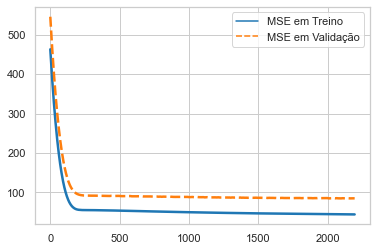

In [50]:
# plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth  = 2.5)

In [51]:
previsoes = modelo.predict(x_teste).flatten()

In [52]:
previsoes

array([20.915676, 18.465435, 23.886211, 21.327072, 20.588974, 20.685776,
       24.49121 , 21.913921, 21.072975, 20.879375, 25.828255, 23.414314,
       21.284725, 22.718567, 23.244915, 21.62352 , 26.983803, 23.341717,
       29.45824 , 19.990028, 20.455875, 21.018524, 19.26403 , 20.915676,
       19.03413 , 23.499016, 22.86377 , 14.393802, 17.285686, 35.26017 ,
       21.502522, 18.302086, 20.03843 , 22.797218, 31.569683, 24.297611,
       21.81712 , 28.018349, 25.731457, 32.23518 , 27.588799, 30.631939,
       32.10208 , 17.285686, 23.057365, 23.269115, 18.429134, 23.541367,
       37.250614, 35.39932 , 18.229485, 34.788273, 31.121986, 25.888756,
       23.632114, 22.797218, 26.100506, 27.836845, 24.702961, 24.321812,
       23.166267, 19.124882, 23.402214, 22.803268, 21.115326, 20.256226,
       21.248425, 22.174068, 21.65982 , 21.569073, 27.03825 , 24.81791 ,
       11.017913, 14.115502, 17.200989, 23.341717, 17.582138, 18.054035,
       23.378014, 21.514622, 20.262276, 25.931107, 

In [56]:
y_teste.values

array([18.9, 13.9, 18.4, 14.5, 13.2, 24.7, 30.8, 25.3, 16.6, 23.4, 31.6,
       24.2, 22.8, 24.8, 23.9, 22.2, 23.6, 22. , 33.2, 19.5, 18.3, 19.2,
       19.3, 20.3, 16.2, 18. , 19.6, 14.6, 19.6, 50. , 25. , 23.1, 22.6,
       24.6, 39.8, 32.5, 29.6, 36.4, 31.1, 50. , 30.3, 42.3, 48.5, 19.3,
       22.2, 23.7, 17.6, 24.8, 50. , 48.8, 22.8, 50. , 35.2, 33.1, 22. ,
       22.3, 28.5, 37.3, 27.9, 23.8, 23.1, 18.5, 25. , 22.2, 21.1, 18.5,
       20.6, 17.8, 22.7, 22.6, 50. , 13.9,  8.8, 10.2, 11.5, 12.5,  5. ,
        8.5, 16.7, 13.4,  8.3, 14.1, 10.5, 15.4, 14.1, 13. , 13.4, 16.1,
       14.9, 16.4, 19.5, 21.4, 19. , 19.9, 23.2, 16.7, 15.2,  7. ,  8.1,
       20.1, 22. ])

In [58]:
np.shape(y_teste.values)

(101,)

In [59]:
np.shape(previsoes)

(101,)